In [2]:
import tensorflow as tf
import os

## Remove Problematic Images

In [3]:
import cv2
import imghdr
import matplotlib.pyplot as plt

remove all images less than 10kb

In [4]:
data_dir="data"
image_exts=['jpeg','jpg','bmp','png']


In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

.ipynb_checkpoints
05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
60632274._UY200_.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_1524148

In [7]:
img=cv2.imread("data/happy/bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg")

In [8]:
img

array([[[186, 182, 181],
        [188, 184, 183],
        [191, 187, 186],
        ...,
        [149, 154, 157],
        [149, 154, 157],
        [149, 154, 157]],

       [[186, 182, 181],
        [188, 184, 183],
        [190, 186, 185],
        ...,
        [149, 154, 157],
        [149, 154, 157],
        [149, 154, 157]],

       [[186, 182, 181],
        [188, 184, 183],
        [190, 186, 185],
        ...,
        [149, 154, 157],
        [149, 154, 157],
        [149, 154, 157]],

       ...,

       [[ 61,  64,  72],
        [ 60,  63,  71],
        [ 60,  63,  71],
        ...,
        [  4,  20,  33],
        [  5,  21,  34],
        [  5,  21,  34]],

       [[ 61,  64,  72],
        [ 60,  63,  71],
        [ 60,  63,  71],
        ...,
        [  3,  19,  32],
        [  3,  19,  32],
        [  3,  19,  32]],

       [[ 61,  64,  72],
        [ 61,  64,  72],
        [ 60,  63,  71],
        ...,
        [  3,  16,  30],
        [  3,  16,  30],
        [  3,  16,  30]]

In [9]:
img.shape

(1707, 2560, 3)

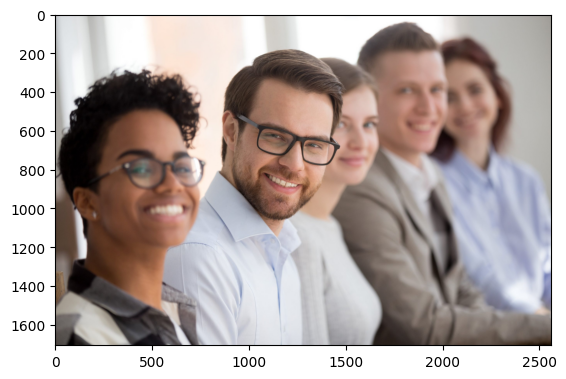

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in extension list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")
            

Issue with image data\happy\.ipynb_checkpoints


## Load Data 

In [12]:
import numpy as np

In [13]:
data=tf.keras.utils.image_dataset_from_directory("data")

Found 310 files belonging to 2 classes.


You can customise the data set, eg:
tf.keras.utils.image_dataset_from_directory(
"data",
batch_size=8,
image_size=(128,128))

In [14]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [15]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator=data.as_numpy_iterator()

In [17]:
data_iterator

In [18]:
batch=data_iterator.next()

In [19]:
batch

(array([[[[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          [254.       , 254.       , 254.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         ...,
 
         [[2

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

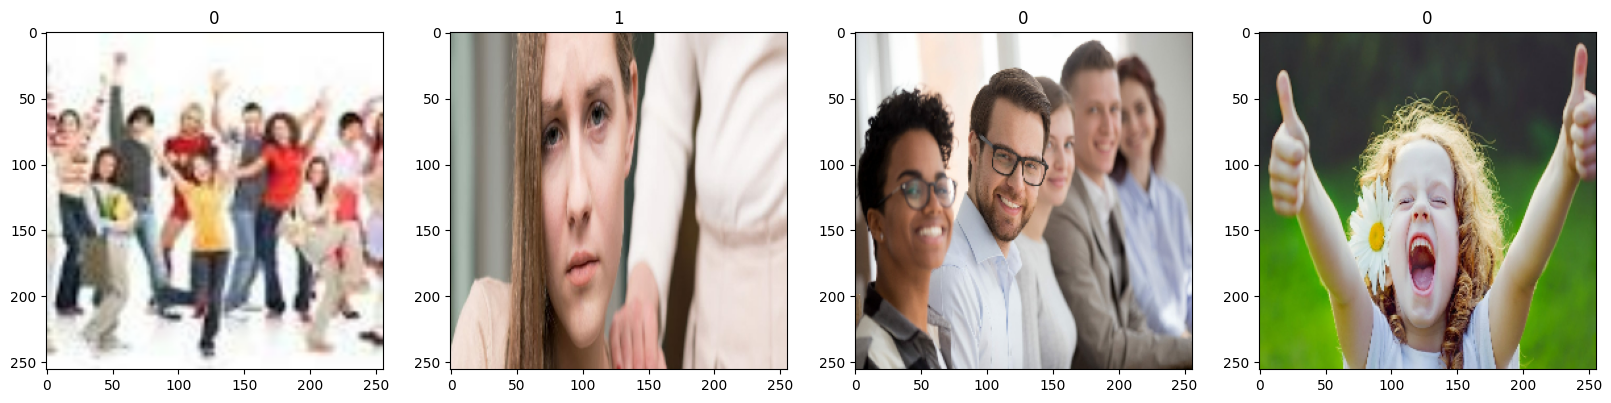

In [22]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Thus now we know that 0->happy,
                      1->sad,

## Preprocess data

In [23]:
data=data.map(lambda x,y:(x/255,y))

In [24]:
scaled_iterator=data.as_numpy_iterator()

In [25]:
scaled_iterator.next()[0]

array([[[[0.08627451, 0.08235294, 0.06666667],
         [0.08627451, 0.08235294, 0.06666667],
         [0.08627451, 0.08235294, 0.06666667],
         ...,
         [0.04705882, 0.03921569, 0.04313726],
         [0.04705882, 0.03921569, 0.04313726],
         [0.04705882, 0.03921569, 0.04313726]],

        [[0.08560049, 0.08167892, 0.06599265],
         [0.08562945, 0.08170788, 0.06602161],
         [0.0857611 , 0.08183952, 0.06615325],
         ...,
         [0.04672181, 0.03887868, 0.04280024],
         [0.04672181, 0.03887868, 0.04280024],
         [0.04672181, 0.03887868, 0.04280024]],

        [[0.08253676, 0.0786152 , 0.06292892],
         [0.08269737, 0.0787758 , 0.06308953],
         [0.0834274 , 0.07950583, 0.06381956],
         ...,
         [0.04518995, 0.03734681, 0.04126838],
         [0.04518995, 0.03734681, 0.04126838],
         [0.04518995, 0.03734681, 0.04126838]],

        ...,

        [[0.4584559 , 0.35257354, 0.24669118],
         [0.45710784, 0.3515625 , 0.24568015]

## Split Data 

In [26]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)


In [27]:
train_size,val_size,test_size

(7, 2, 1)

In [28]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Model 

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [32]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train 

In [37]:
logdir="logs"

In [38]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 1.0660 - accuracy: 0.5848 - val_loss: 0.6257 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.6431 - accuracy: 0.5357 - val_loss: 0.6212 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 13s 2s/step - loss: 0.6300 - accuracy: 0.6250 - val_loss: 0.6584 - val_accuracy: 0.5156
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.6119 - accuracy: 0.6607 - val_loss: 0.5440 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.6161 - accuracy: 0.6830 - val_loss: 0.5703 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.5513 - accuracy: 0.7411 - val_loss: 0.4416 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.4752 - accuracy: 0.7902 - val_loss: 0.5097 - val_accuracy: 0.7188
Epoch 8/20
7/7 [==================

In [42]:
hist.history

{'loss': [1.066035509109497,
  0.6431344747543335,
  0.6300002336502075,
  0.6119231581687927,
  0.6160981059074402,
  0.5513328313827515,
  0.4752081036567688,
  0.5226860046386719,
  0.41921618580818176,
  0.39206600189208984,
  0.32821622490882874,
  0.21926547586917877,
  0.22876909375190735,
  0.1527189165353775,
  0.08823495358228683,
  0.07118392735719681,
  0.0465761236846447,
  0.033538851886987686,
  0.022327344864606857,
  0.021381521597504616],
 'accuracy': [0.5848214030265808,
  0.5357142686843872,
  0.625,
  0.6607142686843872,
  0.6830357313156128,
  0.7410714030265808,
  0.7901785969734192,
  0.7633928656578064,
  0.8392857313156128,
  0.8035714030265808,
  0.8794642686843872,
  0.9151785969734192,
  0.9375,
  0.9508928656578064,
  0.9821428656578064,
  0.96875,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  1.0],
 'val_loss': [0.6257233619689941,
  0.6211827993392944,
  0.6584373116493225,
  0.5439645051956177,
  0.5703423023223877,
  0.44164055585861206,
  0.509

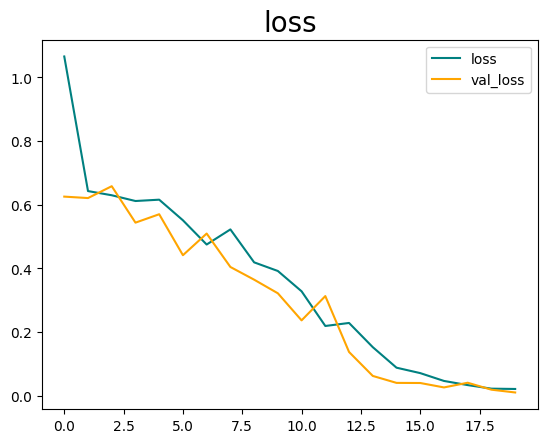

In [43]:
fig=plt.figure()
plt.plot(hist.history['loss'],color="teal",label="loss")
plt.plot(hist.history['val_loss'],color="orange",label="val_loss")
plt.title("loss",fontsize=20)
plt.legend()
plt.show()

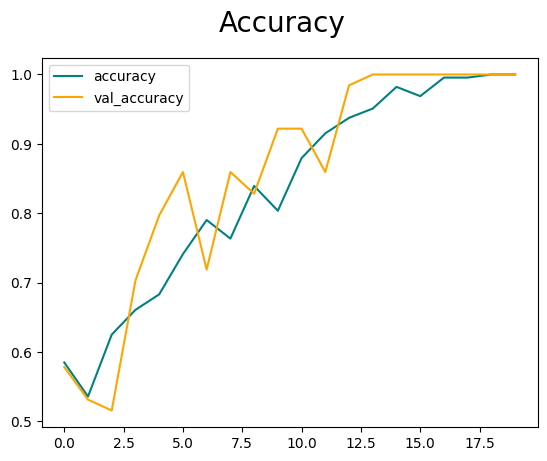

In [47]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color="teal",label="accuracy")
plt.plot(hist.history['val_accuracy'],color="orange",label="val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 298ms/step


In [56]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### Final Test 

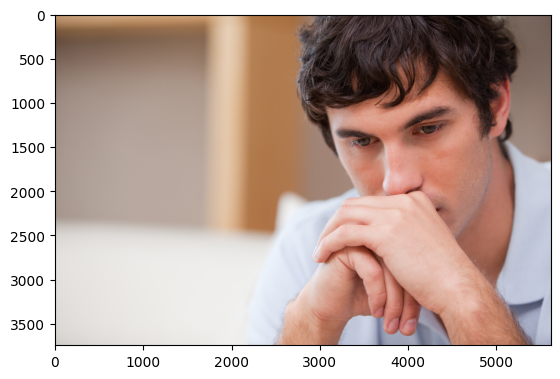

In [58]:
img=cv2.imread("8iAb9k4aT.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

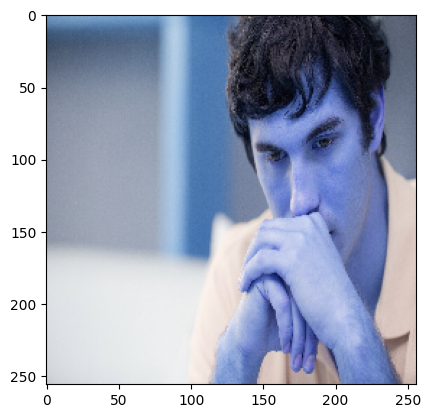

In [59]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [60]:
#our model requires batch as input:
resize.shape

TensorShape([256, 256, 3])

In [61]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [65]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 63ms/step


In [67]:
yhat

array([[0.9868115]], dtype=float32)

In [68]:
if yhat>0.5:
    print("Sad")
else:
    print("Happy")

Sad


## Save the model 

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save("my_model/happy_sad_img_model.h5")

C:\Users\manav\Python_Jupyter\GitHub Projects\ImageClassification\imageclassify\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
new_model=load_model('my_model/happy_sad_img_model.h5')

In [72]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 203ms/step


In [73]:
if yhatnew>0.5:
    print("sad")
else:
    print("happy")

sad
